In [60]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision.transforms import transforms

In [61]:
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
torch.manual_seed(19)

In [62]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224, 224)),
])

dataset_path = 'train'

dataset = ImageFolder(root=dataset_path, transform=transform)
dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [58]:
class_names = train_dataset.classes
class_names

['Acne and Rosacea Photos',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 'Atopic Dermatitis Photos',
 'Bullous Disease Photos',
 'Cellulitis Impetigo and other Bacterial Infections',
 'Eczema Photos',
 'Exanthems and Drug Eruptions',
 'Hair Loss Photos Alopecia and other Hair Diseases',
 'Herpes HPV and other STDs Photos',
 'Light Diseases and Disorders of Pigmentation',
 'Lupus and other Connective Tissue diseases',
 'Melanoma Skin Cancer Nevi and Moles',
 'Nail Fungus and other Nail Disease',
 'Poison Ivy Photos and other Contact Dermatitis',
 'Psoriasis pictures Lichen Planus and related diseases',
 'Scabies Lyme Disease and other Infestations and Bites',
 'Seborrheic Keratoses and other Benign Tumors',
 'Systemic Disease',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Urticaria Hives',
 'Vascular Tumors',
 'Vasculitis Photos',
 'Warts Molluscum and other Viral Infections']

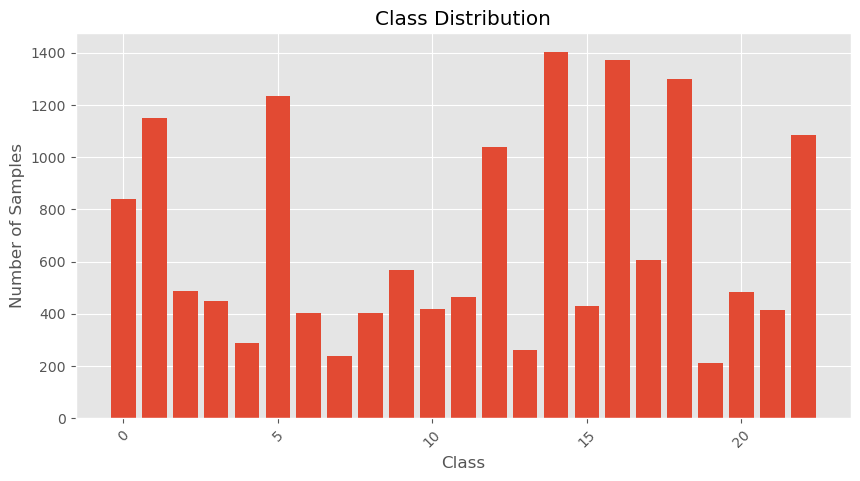

In [9]:
class_counts = [0] * len(class_names)

for images, labels in train_loader:
    for label in labels.numpy():
        class_counts[label] += 1

plt.figure(figsize=(10, 5))
plt.bar(range(len(class_names)), class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

In [63]:
images, labels = next(iter(dataloader))
print(images.shape)

torch.Size([32, 3, 224, 224])


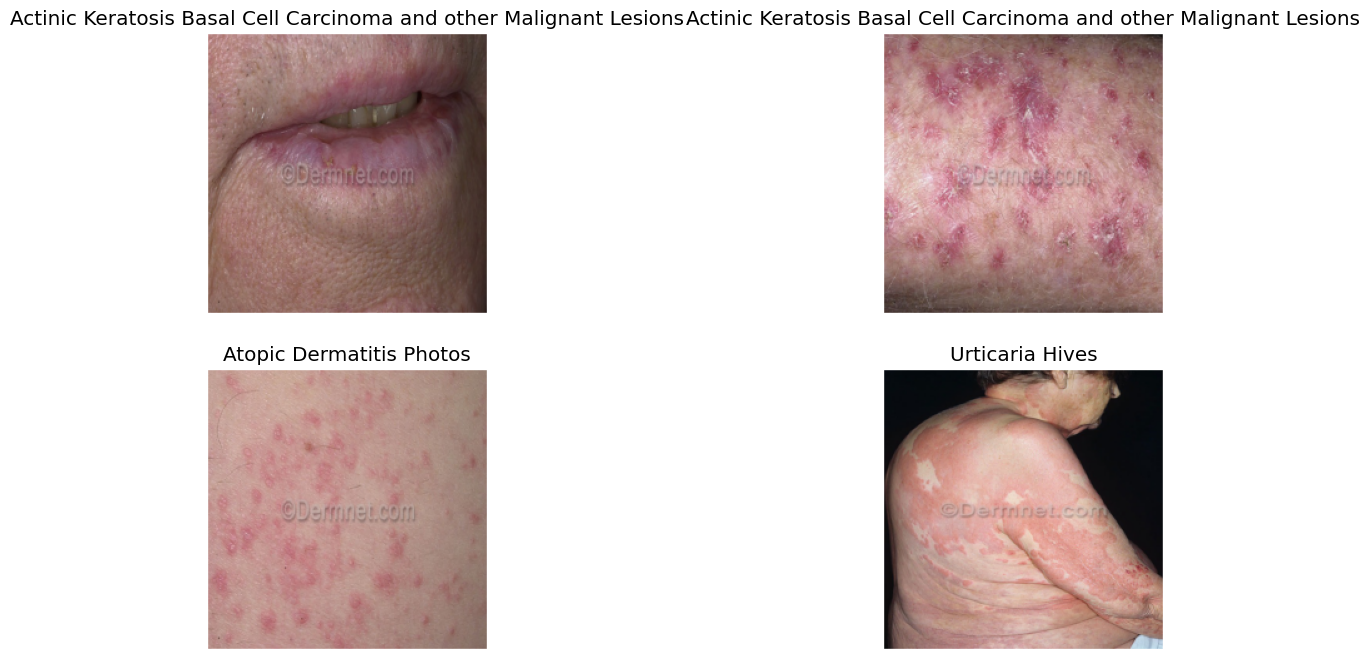

In [64]:
label_map = {v: k for k, v in dataset.class_to_idx.items()}

fig = plt.figure(figsize=(16, 8))
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1, xticks=[], yticks=[])
    ax.imshow(np.transpose(images[i+4], (1, 2, 0)))
    ax.set_title(label_map[labels[i+4].item()])
plt.show()

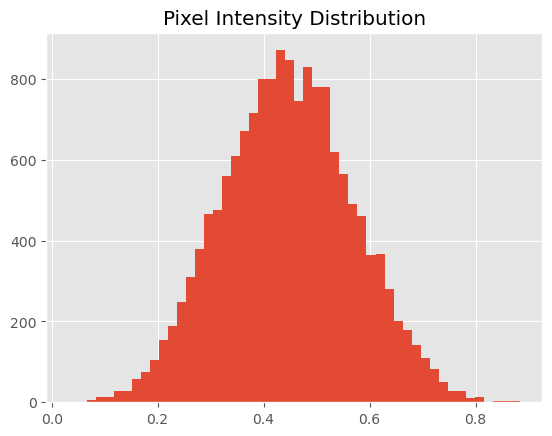

In [46]:
intensities = []

for images, _ in dataloader:
    for image in images:
        intensities.append(image.numpy().mean())
plt.hist(intensities, bins=50)
plt.title('Pixel Intensity Distribution')
plt.show()